Define function to plot the output of any given function

In [3]:
from fastai.vision.all import *
import pylab as plt

In [20]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max,steps=20)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x, f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

Define quadratic function $3x^2 + 2x + 1$

In [4]:
def quad(x): return 3 * x**2 + 2 * x + 1

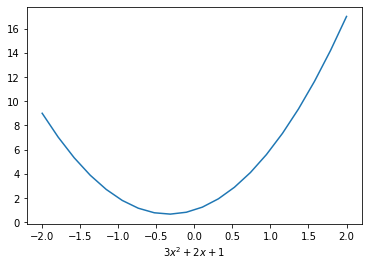

In [6]:
plot_function(quad, '$3x^2 + 2x + 1$')

In [7]:
from numpy.random import normal, seed, uniform
def noise(x, scale) : return normal(scale = scale, size = x.shape)
def add_noise(x, mult, add): return x + (1 + noise(x, mult)) + noise(x, add)

In [8]:
def quad(a, b, c, x): return a * x**2 + b * x + c

In [9]:
from functools import partial
def make_quad(a, b, c) : return partial(quad, a, b, c)

In [10]:
f = make_quad(3, 2, 1)

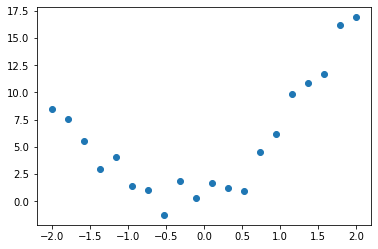

In [36]:
x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.3, 1.5)
plt.scatter(x, y)

In [12]:
from ipywidgets import interact

In [24]:
@interact(a = 1.5, b = 1.5, c = 1.5)
def plot_quad(a, b, c):
    plot_function(make_quad(a, b, c))
    plt.scatter(x, y)

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [44]:
def mse(pred, act) : return ((pred - act) ** 2).mean()

In [47]:
@interact(a = 1.5, b = 1.5, c = 1.5)
def plot_quad(a, b, c):
    f = make_quad(a, b, c)
    loss = mse(f(x), y)
    title = "MSE: " + str(loss)
    plot_function(f, title=f'MSE: {loss:.2f}')
    plt.scatter(x, y)

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [48]:
def quad_mse(params):
    f = make_quad(*params)
    return mse(f(x), y)

In [50]:
quad_mse([1.5, 1.5, 1.5])

tensor(10.6194, dtype=torch.float64)

In [52]:
quad_mse([3.0, 1.5, 1.5])

tensor(2.2400, dtype=torch.float64)

In [53]:
quad_mse([3.5, 1.5, 1.5])

tensor(3.3429, dtype=torch.float64)

In [54]:
quad_mse([2.5, 1.5, 1.5])

tensor(3.0851, dtype=torch.float64)

In [55]:
quad_mse([3.0, 2.0, 1.5])

tensor(1.4284, dtype=torch.float64)

Let's create a tensor to do calculate the quadratic MSE

In [64]:
a_tensor = tensor([1.5, 1.5, 1.5])
a_tensor

tensor([1.5000, 1.5000, 1.5000])

And let's tell Pytorch that we'd like compute gradient at those numbers. Note, Pytorch has flagged that this tensore requires gradient whenever it's used in calculations

In [65]:
a_tensor.requires_grad_()
a_tensor

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

Let's compute the quadratic MSE using our tensor. Note, in the output of the calculation Pytorch indicates that knows how to calculate the gradients

In [68]:
loss = quad_mse(a_tensor)
loss

tensor(10.6194, dtype=torch.float64, grad_fn=<MeanBackward0>)

Let's ask Pytorch to go ahead and calculate the gradients. Nothing seems to happen but 

In [69]:
loss.backward()

Let's take a look at the gradients. Gradients are telling us that:
- loss will go down by a lot if we increase the first parameter **a**
- loss will go down somewhat if we increase the second parameter **b**
- loss will go down if we increase the tird parameter **c**

In [71]:
a_tensor.grad

tensor([-22.8607,  -4.7201,  -7.5652])